In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Loading Raw Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train[:, 0:27, 0:27]
x_test = x_test[:, 0:27, 0:27]

In [3]:
x_train_flatten = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])/255.0
x_test_flatten = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])/255.0

In [4]:
print(x_train_flatten.shape, y_train.shape)
print(x_test_flatten.shape, y_test.shape)

(60000, 729) (60000,)
(10000, 729) (10000,)


In [5]:
x_train_0 = x_train_flatten[y_train == 0]
x_train_1 = x_train_flatten[y_train == 1]
x_train_2 = x_train_flatten[y_train == 2]
x_train_3 = x_train_flatten[y_train == 3]
x_train_4 = x_train_flatten[y_train == 4]
x_train_5 = x_train_flatten[y_train == 5]
x_train_6 = x_train_flatten[y_train == 6]
x_train_7 = x_train_flatten[y_train == 7]
x_train_8 = x_train_flatten[y_train == 8]
x_train_9 = x_train_flatten[y_train == 9]

x_train_list = [x_train_0, x_train_1, x_train_2, x_train_3, x_train_4, x_train_5, x_train_6, x_train_7, x_train_8, x_train_9]

print(x_train_0.shape)
print(x_train_1.shape)
print(x_train_2.shape)
print(x_train_3.shape)
print(x_train_4.shape)
print(x_train_5.shape)
print(x_train_6.shape)
print(x_train_7.shape)
print(x_train_8.shape)
print(x_train_9.shape)

(5923, 729)
(6742, 729)
(5958, 729)
(6131, 729)
(5842, 729)
(5421, 729)
(5918, 729)
(6265, 729)
(5851, 729)
(5949, 729)


In [6]:
x_test_0 = x_test_flatten[y_test == 0]
x_test_1 = x_test_flatten[y_test == 1]
x_test_2 = x_test_flatten[y_test == 2]
x_test_3 = x_test_flatten[y_test == 3]
x_test_4 = x_test_flatten[y_test == 4]
x_test_5 = x_test_flatten[y_test == 5]
x_test_6 = x_test_flatten[y_test == 6]
x_test_7 = x_test_flatten[y_test == 7]
x_test_8 = x_test_flatten[y_test == 8]
x_test_9 = x_test_flatten[y_test == 9]

x_test_list = [x_test_0, x_test_1, x_test_2, x_test_3, x_test_4, x_test_5, x_test_6, x_test_7, x_test_8, x_test_9]

print(x_test_0.shape)
print(x_test_1.shape)
print(x_test_2.shape)
print(x_test_3.shape)
print(x_test_4.shape)
print(x_test_5.shape)
print(x_test_6.shape)
print(x_test_7.shape)
print(x_test_8.shape)
print(x_test_9.shape)

(980, 729)
(1135, 729)
(1032, 729)
(1010, 729)
(982, 729)
(892, 729)
(958, 729)
(1028, 729)
(974, 729)
(1009, 729)


# Selecting the dataset

Output: X_train, Y_train, X_test, Y_test

In [77]:
n_train_sample_per_class = 10
n_class = 10

X_train = x_train_list[0][:n_train_sample_per_class, :]
Y_train = np.zeros((X_train.shape[0]*n_class,), dtype=int)

for i in range(n_class-1):
    X_train = np.concatenate((X_train, x_train_list[i+1][:n_train_sample_per_class, :]), axis=0)
    Y_train[(i+1)*n_train_sample_per_class:(i+2)*n_train_sample_per_class] = i+1

X_train.shape, Y_train.shape

((100, 729), (100,))

In [78]:
n_test_sample_per_class = int(0.25*n_train_sample_per_class)

X_test = x_test_list[0][:n_test_sample_per_class, :]
Y_test = np.zeros((X_test.shape[0]*n_class,), dtype=int)

for i in range(n_class-1):
    X_test = np.concatenate((X_test, x_test_list[i+1][:n_test_sample_per_class, :]), axis=0)
    Y_test[(i+1)*n_test_sample_per_class:(i+2)*n_test_sample_per_class] = i+1

X_test.shape, Y_test.shape

((20, 729), (20,))

# Dataset Preprocessing

In [79]:
X_train = X_train.reshape(X_train.shape[0], 27, 27)
X_test = X_test.reshape(X_test.shape[0], 27, 27)

X_train.shape, X_test.shape

((100, 27, 27), (20, 27, 27))

In [80]:
Y_train_dict = []
for i in range(np.unique(Y_train).shape[0]):
    temp_Y = np.zeros(Y_train.shape)
    
    temp_Y[Y_train == i] = 0  # positive class
    temp_Y[Y_train != i] = 1  # negative class
    temp_Y = to_categorical(temp_Y)
    Y_train_dict += [('Y' + str(i), temp_Y)]
    
Y_train_dict = dict(Y_train_dict)

In [81]:
Y_test_dict = []
for i in range(np.unique(Y_test).shape[0]):
    temp_Y = np.zeros(Y_test.shape)
    
    temp_Y[Y_test == i] = 0  # positive class
    temp_Y[Y_test != i] = 1  # negative class
    temp_Y = to_categorical(temp_Y)
    Y_test_dict += [('Y' + str(i), temp_Y)]
    
Y_test_dict = dict(Y_test_dict)

In [82]:
Y_train_dict['Y1'].shape, Y_test_dict['Y0'].shape

((100, 2), (20, 2))

# Quantum

In [83]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer, GradientDescentOptimizer

qml.enable_tape()

from tensorflow.keras.utils import to_categorical

# Set a random seed
np.random.seed(2020)

In [84]:
# Define output labels as quantum state vectors
def density_matrix(state):
    """Calculates the density matrix representation of a state.

    Args:
        state (array[complex]): array representing a quantum state vector

    Returns:
        dm: (array[complex]): array representing the density matrix
    """
    return state * np.conj(state).T


label_0 = [[1], [0]]
label_1 = [[0], [1]]
state_labels = [label_0, label_1]

In [85]:
dev_conv = qml.device("default.qubit", wires=9)


@qml.qnode(dev_conv)
def q_conv(conv_params, inputs):
    """A variational quantum circuit representing the Universal classifier + Conv.

    Args:
        params (array[float]): array of parameters
        x (array[float]): 2-d input vector
        y (array[float]): single output state density matrix

    Returns:
        float: fidelity between output state and input
    """
    # layer iteration
    for l in range(len(conv_params[0])):
        # RY layer
        # height iteration
        for i in range(3):
            # width iteration
            for j in range(3):
                qml.RY((conv_params[0][l][3*i+j] * inputs[i, j] + conv_params[1][l][3*i+j]), wires=(3*i+j))
    
        # entangling layer
        for i in range(9):
            if i != (9-1):
                qml.CNOT(wires=[i, i+1])

    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1) @ qml.PauliZ(2) @ qml.PauliZ(3) @ qml.PauliZ(4) @ qml.PauliZ(5) @ qml.PauliZ(6) @ qml.PauliZ(7) @ qml.PauliZ(8))

In [86]:
# Input image, size = 27 x 27
X = tf.keras.Input(shape=(27,27), name='Input_Layer')


# Specs for Conv
c_filter = 3
c_strides = 2


# First Quantum Conv Layer, trainable params = 18*L, output size = 13 x 13
num_conv_layer_1 = 2
q_conv_layer_1 = qml.qnn.KerasLayer(q_conv, {"conv_params": (2, num_conv_layer_1, 9)}, output_dim=(1), name='Quantum_Conv_Layer_1')
size_1 = int(1+(X.shape[1]-c_filter)/c_strides)
q_conv_layer_1_list = []
# height iteration
for i in range(size_1):
    # width iteration
    for j in range(size_1):
        temp = q_conv_layer_1(X[:, 2*i:2*(i+1)+1, 2*j:2*(j+1)+1])
        temp = tf.keras.layers.Reshape((1,))(temp)
        q_conv_layer_1_list += [temp]
concat_layer_1 = tf.keras.layers.Concatenate(axis=1)(q_conv_layer_1_list)
reshape_layer_1 = tf.keras.layers.Reshape((size_1, size_1))(concat_layer_1)


# Second Quantum Conv Layer, trainable params = 18*L, output size = 6 x 6
num_conv_layer_2 = 2
q_conv_layer_2 = qml.qnn.KerasLayer(q_conv, {"conv_params": (2, num_conv_layer_2, 9)}, output_dim=(1), name='Quantum_Conv_Layer_2')
size_2 = int(1+(reshape_layer_1.shape[1]-c_filter)/c_strides)
q_conv_layer_2_list = []
# height iteration
for i in range(size_2):
    # width iteration
    for j in range(size_2):
        temp = q_conv_layer_2(reshape_layer_1[:, 2*i:2*(i+1)+1, 2*j:2*(j+1)+1])
        temp = tf.keras.layers.Reshape((1,))(temp)
        q_conv_layer_2_list += [temp]
concat_layer_2 = tf.keras.layers.Concatenate(axis=1)(q_conv_layer_2_list)
reshape_layer_2 = tf.keras.layers.Reshape((size_2, size_2))(concat_layer_2)


# Max Pooling Layer, output size = 9
#max_pool_layer = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, name='Max_Pool_Layer')(reshape_layer_2)

model = tf.keras.Model(inputs=X, outputs=reshape_layer_2)

In [87]:
qconv_1_weights = np.array([[[ 0.30478922,  0.24122563,  1.2013984 ,  0.8962295 ,
           2.155613  ,  1.808066  , -0.6777786 , -1.3539367 ,
           0.46882528],
         [ 0.10804682,  0.4899469 , -1.4487113 ,  0.18007451,
           0.21117014, -0.07102177,  0.22456087,  0.19595939,
           0.620559  ]],
 
        [[ 0.08490325, -0.46300295,  0.88712513,  0.21560192,
           0.68917143, -1.3093163 ,  1.0160891 , -0.17013887,
           0.09957722],
         [ 0.08793638, -0.0810757 , -0.3338206 ,  0.5029927 ,
           0.46003294,  0.47570366, -0.18548904, -0.2648427 ,
          -0.0655445 ]]])

qconv_2_weights = np.array([[[ 2.7642950e-01,  2.3297124e+00, -7.7425838e-01,  4.8847955e-01,
           4.3419965e-02, -3.3615255e-01, -1.0063299e+00,  2.2314610e+00,
           9.1715485e-01],
         [-4.1352111e-01,  3.0436099e-02, -1.2301649e+00,  1.7263293e-03,
          -1.5698449e-01,  4.4744748e-01,  1.2136365e+00,  2.7647603e-01,
           1.0283145e+00]],
 
        [[-3.3875754e-01,  1.0402726e+00, -4.2845064e-01,  7.4869722e-02,
           3.8802050e-02,  3.3155876e-01, -7.6660907e-01,  3.3909407e-01,
           3.5294789e-01],
         [ 6.6214994e-02, -1.3985926e-01,  9.4863945e-01, -1.1182010e-01,
           2.7276468e-01,  3.9622694e-01,  3.1741151e-01, -2.2376621e-01,
           3.0038670e-01]]])

In [88]:
model_qconv_1 = tf.keras.Model(inputs=X, outputs=reshape_layer_1)
model_qconv_1(X_train[0:1])
model_qconv_1.get_layer('Quantum_Conv_Layer_1').set_weights([qconv_1_weights])

model_qconv_2 = tf.keras.Model(inputs=X, outputs=reshape_layer_2)
model_qconv_2(X_train[0:1])
model_qconv_2.get_layer('Quantum_Conv_Layer_1').set_weights([qconv_1_weights])
model_qconv_2.get_layer('Quantum_Conv_Layer_2').set_weights([qconv_2_weights])

In [89]:
model_qconv_1.get_layer('Quantum_Conv_Layer_1').weights

[<tf.Variable 'model_14/Quantum_Conv_Layer_1/conv_params:0' shape=(2, 2, 9) dtype=float32, numpy=
 array([[[ 0.30478922,  0.24122563,  1.2013984 ,  0.8962295 ,
           2.155613  ,  1.808066  , -0.6777786 , -1.3539367 ,
           0.46882528],
         [ 0.10804682,  0.4899469 , -1.4487113 ,  0.18007451,
           0.21117014, -0.07102177,  0.22456087,  0.19595939,
           0.620559  ]],
 
        [[ 0.08490325, -0.46300295,  0.88712513,  0.21560192,
           0.68917143, -1.3093163 ,  1.0160891 , -0.17013887,
           0.09957722],
         [ 0.08793638, -0.0810757 , -0.3338206 ,  0.5029927 ,
           0.46003294,  0.47570366, -0.18548904, -0.2648427 ,
          -0.0655445 ]]], dtype=float32)>]

In [90]:
model_qconv_2.get_layer('Quantum_Conv_Layer_2').weights

[<tf.Variable 'model_15/Quantum_Conv_Layer_2/conv_params:0' shape=(2, 2, 9) dtype=float32, numpy=
 array([[[ 2.7642950e-01,  2.3297124e+00, -7.7425838e-01,  4.8847955e-01,
           4.3419965e-02, -3.3615255e-01, -1.0063299e+00,  2.2314610e+00,
           9.1715485e-01],
         [-4.1352111e-01,  3.0436099e-02, -1.2301649e+00,  1.7263293e-03,
          -1.5698449e-01,  4.4744748e-01,  1.2136365e+00,  2.7647603e-01,
           1.0283145e+00]],
 
        [[-3.3875754e-01,  1.0402726e+00, -4.2845064e-01,  7.4869722e-02,
           3.8802050e-02,  3.3155876e-01, -7.6660907e-01,  3.3909407e-01,
           3.5294789e-01],
         [ 6.6214994e-02, -1.3985926e-01,  9.4863945e-01, -1.1182010e-01,
           2.7276468e-01,  3.9622694e-01,  3.1741151e-01, -2.2376621e-01,
           3.0038670e-01]]], dtype=float32)>]

In [64]:
import time
start = time.process_time()
img_after_qconv_1 = model_qconv_1(X_train[0:5])
img_after_qconv_2 = model_qconv_2(X_train[0:5])
print(time.process_time() - start)

38.46875


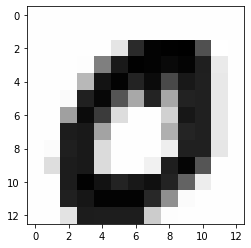

In [75]:
plt.imshow(img_after_qconv_1[4], cmap='gray')

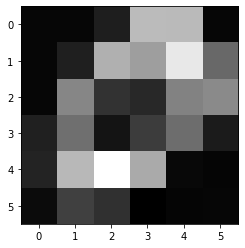

In [76]:
plt.imshow(img_after_qconv_2[0], cmap='gray')

In [33]:
first_6_epoch_weights = model.weights
first_6_epoch_weights

[<tf.Variable 'model/Quantum_Conv_Layer_1/conv_params:0' shape=(2, 2, 9) dtype=float32, numpy=
 array([[[ 0.30478922,  0.24122563,  1.2013984 ,  0.8962295 ,
           2.155613  ,  1.808066  , -0.6777786 , -1.3539367 ,
           0.46882528],
         [ 0.10804682,  0.4899469 , -1.4487113 ,  0.18007451,
           0.21117014, -0.07102177,  0.22456087,  0.19595939,
           0.620559  ]],
 
        [[ 0.08490325, -0.46300295,  0.88712513,  0.21560192,
           0.68917143, -1.3093163 ,  1.0160891 , -0.17013887,
           0.09957722],
         [ 0.08793638, -0.0810757 , -0.3338206 ,  0.5029927 ,
           0.46003294,  0.47570366, -0.18548904, -0.2648427 ,
          -0.0655445 ]]], dtype=float32)>,
 <tf.Variable 'model/Quantum_Conv_Layer_2/conv_params:0' shape=(2, 2, 9) dtype=float32, numpy=
 array([[[ 2.7642950e-01,  2.3297124e+00, -7.7425838e-01,  4.8847955e-01,
           4.3419965e-02, -3.3615255e-01, -1.0063299e+00,  2.2314610e+00,
           9.1715485e-01],
         [-4.1352111e

In [34]:
first_6_epoch_hist = H.history
first_6_epoch_hist

{'loss': [0.9413223266601562,
  0.5048812627792358,
  0.4011978209018707,
  0.347080796957016,
  0.31995534896850586,
  0.29129528999328613],
 'class_weights_loss': [0.2251260131597519,
  0.1090371310710907,
  0.07864071428775787,
  0.0647929459810257,
  0.05809621885418892,
  0.056281398981809616],
 'class_weights_1_loss': [0.21691031754016876,
  0.09565035998821259,
  0.06009742617607117,
  0.043785590678453445,
  0.03979836404323578,
  0.03735021501779556],
 'class_weights_2_loss': [0.2575957775115967,
  0.16418935358524323,
  0.1520228236913681,
  0.13327646255493164,
  0.12420327216386795,
  0.10296647995710373],
 'class_weights_3_loss': [0.24169006943702698,
  0.13600443303585052,
  0.11043684929609299,
  0.10522573441267014,
  0.0978575050830841,
  0.09469721466302872],
 'class_weights_accuracy': [0.7325000166893005,
  0.862500011920929,
  0.9137499928474426,
  0.9212499856948853,
  0.9337499737739563,
  0.9449999928474426],
 'class_weights_1_accuracy': [0.7612500190734863,
  0.